 <hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center">Projet de Machine Learning</h1> 
<hr style="border-width:2px;border-color:#75DFC1">

## Description des variables :

| Nom | Description |
|:---|:---|
| **Id_pol** | Identifiant unique de la police d'assurance. |
| **Annual.pct.driven** | Pourcentage de l'année pendant lequel le véhicule est conduit. |
| **Total.miles.driven** | Nombre total de miles parcourus pendant l'année. |
| **Pct.drive.mon à Pct.drive.sun** | Pourcentage du total des miles parcourus chaque jour de la semaine (lundi à dimanche). |
| **Pct.drive.2hrs, Pct.drive.3hrs, Pct.drive.4hrs** | Pourcentage du total des miles parcourus en sessions de conduite de 2 heures, 3 heures et 4 heures, respectivement. |
| **Pct.drive.wkday et Pct.drive.wkend** | Pourcentage du total des miles parcourus en semaine (jours ouvrables) et le weekend. |
| **Pct.drive.rush am et Pct.drive.rush pm** | Pourcentage du total des miles parcourus pendant les heures de pointe du matin et du soir. |
| **Avgdays.week** | Nombre moyen de jours par semaine pendant lesquels le véhicule est conduit. |
| **Accel.06miles à Accel.14miles** | Nombre d'accélérations fortes par 100 miles, classées par intensité (par exemple, 0.6 miles par heure^2 à 1.4 miles par heure^2). |
| **Brake.06miles à Brake.14miles** | Nombre de freinages forts par 100 miles, également classés par intensité. |
| **Left.turn.intensity08 à Left.turn.intensity12 et Right.turn.intensity08 à Right.turn.intensity12** | Mesures de l'intensité des virages à gauche et à droite, probablement notées sur une échelle ou selon des seuils spécifiques d'intensité de virage.|
| **Duration** | Durée de la police d'assurance. |
| **Insured_age** | Âge de l'assuré. |
| **Insured_sex** | Sexe de l'assuré. |
| **Car_age** | Âge du véhicule assuré. |
| **Marital** | Statut marital de l'assuré. |
| **Car_use** | Utilisation du véhicule (personnel, professionnel, etc.). |
| **Credit_score** | Score de crédit de l'assuré. |
| **Region** | Région géographique. |
| **Annual_miles_drive** | Nombre annuel de miles parcourus. |
| **Years_noclaims** | Années sans sinistres. |
| **Territory** | Territoire géographique. |
| **AMT_Claim** | Montant des sinistres. |
| **NB_Claim** | Nombre de sinistres. |


## Objectif du Projet

L'objectif principal est de mettre en place different modèle predictif pour predire le montant des sinistre pour optimiser des stratégies d'assurance ou le comportement des aussurés.

### Lecture des données

* Commencons par l'importation des packages nécessaires

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Configurer Pandas pour afficher toutes les lignes et les colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

##Gestion des avertissements
import warnings
# Ignorer tous les avertissements
warnings.filterwarnings('ignore')

### Chargement des données

In [26]:
# Chargement des données
data= pd.read_csv("C:/Users/Skodon/Downloads/DU big data/DB_TELEMATICS_PROPRE_I.csv", sep=',')

In [27]:
data.head()

,Unnamed: 0,Id_pol,Annual.pct.driven,Total.miles.driven,Pct.drive.mon,Pct.drive.tue,Pct.drive.wed,Pct.drive.thr,Pct.drive.fri,Pct.drive.sat,Pct_drive_sun,Pct.drive.2hrs,Pct.drive.3hrs,Pct.drive.4hrs,Pct.drive.wkday,Pct.drive.wkend,Pct.drive.rush am,Pct.drive.rush pm,Avgdays.week,Accel.06miles,Accel.08miles,Accel.09miles,Accel.11miles,Accel.12miles,Accel.14miles,Brake.06miles,Brake.08miles,Brake.09miles,Brake.11miles,Brake.12miles,Brake.14miles,Left.turn.intensity08,Left.turn.intensity09,Left.turn.intensity10,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim,Duration,Insured_age,Insured_sex,Car_age,Marital,Car_use,Credit_score,Region,Annual_miles_drive,Years_noclaims,Territory
0,0,212355,0.600000,5563.385340,0.143993,0.166667,0.130723,0.141441,0.140170,0.151941,0.125065,0.003748,0.002249,0.000000,0.722489,0.277511,0.124964,0.147482,5.174964,37.0,3.0,1.0,1.0,1.0,1.0,174.0,27.0,7.0,2.0,1.0,0.0,647.0,265.0,53.0,14.0,3.0,666.0,310.0,59.0,22.0,6.0,1,4546.222412,229,54,Female,9,Married,Private,775.0,Urban,6213.710,28.0,18
1,1,171111,0.676712,5105.247008,0.119403,0.201306,0.155285,0.137793,0.153848,0.130376,0.101989,0.002129,0.000188,0.000000,0.768119,0.231881,0.078812,0.127525,5.694061,4.0,0.0,0.0,0.0,0.0,0.0,53.0,5.0,1.0,1.0,0.0,0.0,291.0,103.0,21.0,7.0,1.0,622.0,324.0,88.0,24.0,9.0,1,470.114410,331,56,Female,9,Married,Commute,776.0,Urban,12427.420,30.0,64
2,2,199324,0.315068,3530.909423,0.130443,0.161078,0.162398,0.161848,0.131379,0.128151,0.124703,0.000000,0.000000,0.000000,0.745278,0.254722,0.116910,0.120902,6.485414,80.0,6.0,1.0,0.0,0.0,0.0,106.0,13.0,4.0,1.0,1.0,0.0,1049.0,447.0,114.0,41.0,15.0,2131.0,1145.0,395.0,186.0,78.0,1,185.448303,365,38,Female,9,Married,Commercial,685.0,Urban,12427.420,21.0,71
3,3,160668,0.936986,20508.520881,0.145544,0.176017,0.194093,0.155184,0.165195,0.097721,0.066246,0.005739,0.000000,0.000000,0.838405,0.161595,0.172026,0.146229,5.973921,67.0,6.0,1.0,1.0,0.0,0.0,129.0,12.0,4.0,1.0,1.0,0.0,593.0,310.0,117.0,60.0,30.0,2446.0,1515.0,609.0,316.0,151.0,1,2343.274292,366,46,Female,7,Single,Private,491.0,Urban,6213.710,30.0,77
4,4,195403,0.520548,7636.937993,0.180197,0.155260,0.132919,0.155620,0.172082,0.134563,0.069360,0.000827,0.000236,0.000118,0.797636,0.202364,0.114681,0.082364,5.182271,70.0,10.0,2.0,0.0,0.0,0.0,49.0,5.0,1.0,0.0,0.0,0.0,969.0,542.0,178.0,75.0,30.0,824.0,502.0,162.0,72.0,27.0,1,6409.722656,365,37,Male,6,Married,Commute,690.0,Urban,15534.275,16.0,83


In [28]:
# Suppression de la colonne 'Unnamed: 0' et 'Id_pol'
if 'Unnamed: 0' in data.columns:
    data.drop('Unnamed: 0', axis=1, inplace=True)
if 'Id_pol' in data.columns:
    data.drop('Id_pol', axis=1, inplace=True)

### Encodage des variables catégorielles

In [5]:
# Encodage des variables catégorielles
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

### Séparation du jeu données en Entrainement et Test

In [6]:
# Séparation des variables indépendantes et dépendantes
X = data.drop('AMT_Claim', axis=1)
y = data['AMT_Claim']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Normalisation des colonnes

In [ ]:
# Normalisation des caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modélisation non paramétrique

### ARBRE DE DECISION 

In [7]:
# Entraînement d'un modèle d'arbre de décision avec une profondeur maximale de 3
dt_model = DecisionTreeRegressor( max_depth=5,random_state=42) 
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

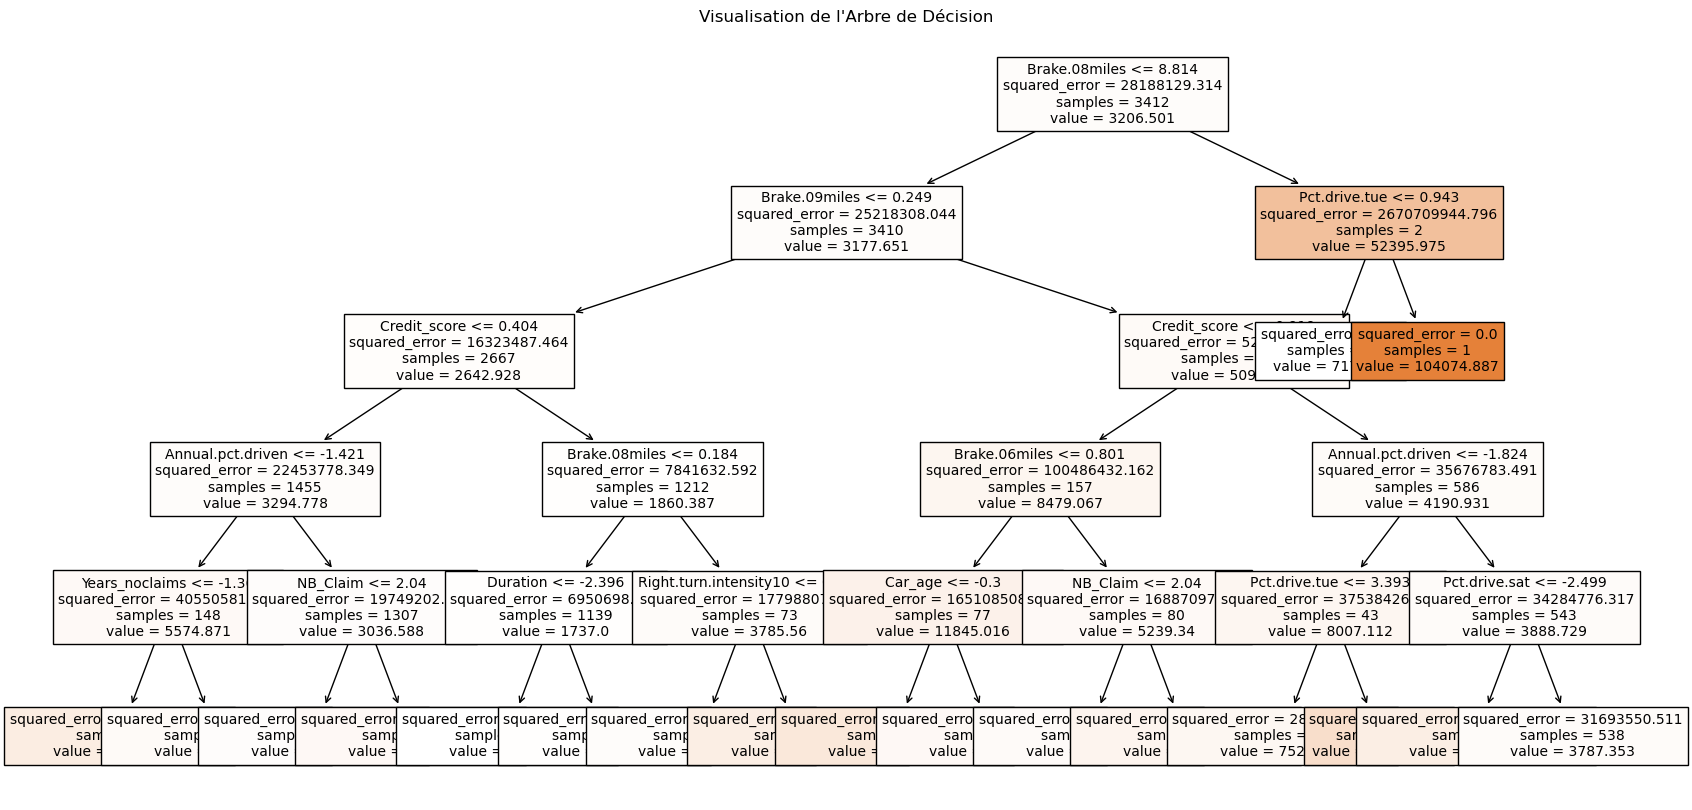

In [8]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, 
               feature_names=X.columns,  
               class_names=['AMT_Claim'],
               filled=True, 
               fontsize=10)
plt.title("Visualisation de l'Arbre de Décision")
plt.show()

In [9]:
feature_names = data.columns.tolist()  ## Conversion en liste notre base de données

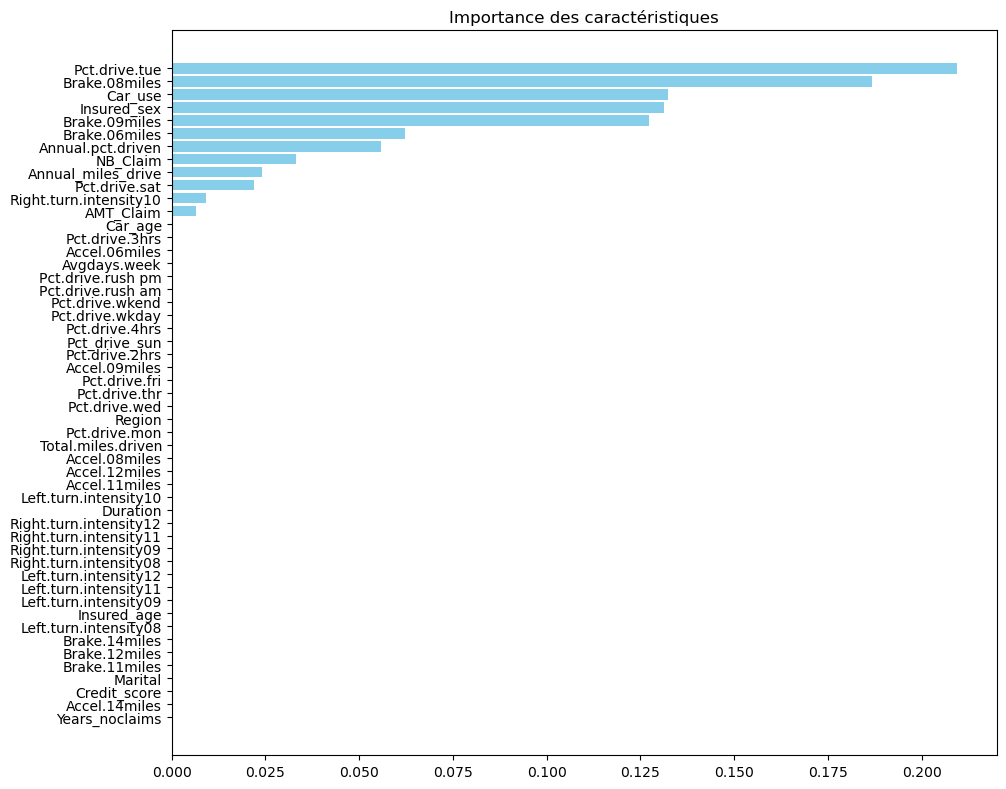

In [10]:
# Importance des caractéristiques
feature_importances = dt_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [feature_names[i] for i in indices]

plt.figure(figsize=(12, 8))
plt.title("Importance des caractéristiques")
plt.barh(range(len(feature_importances)), feature_importances[indices], color='skyblue')
plt.yticks(range(len(feature_importances)), names)
plt.gca().invert_yaxis() 
plt.tight_layout()

# Option pour améliorer la lisibilité des étiquettes
plt.subplots_adjust(left=0.3)  

plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédiction sur les données de test
y_pred = dt_model.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 18388221.179406777
Mean Absolute Error (MAE): 2607.3757682972628
R-squared (R²): 0.10288941647030958


### SVM

In [12]:
# Entraînement d'un modèle SVM
svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédiction sur les données de test
y_pred = svm_model.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 22314968.833851814
Mean Absolute Error (MAE): 2459.528767001393
R-squared (R²): -0.08868576882266366


###  Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Entraînement d'un modèle Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prédiction sur les données de test
y_pred = rf_model.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 9061571.6611214
Mean Absolute Error (MAE): 1903.5018000445996
R-squared (R²): 0.5579109169238858


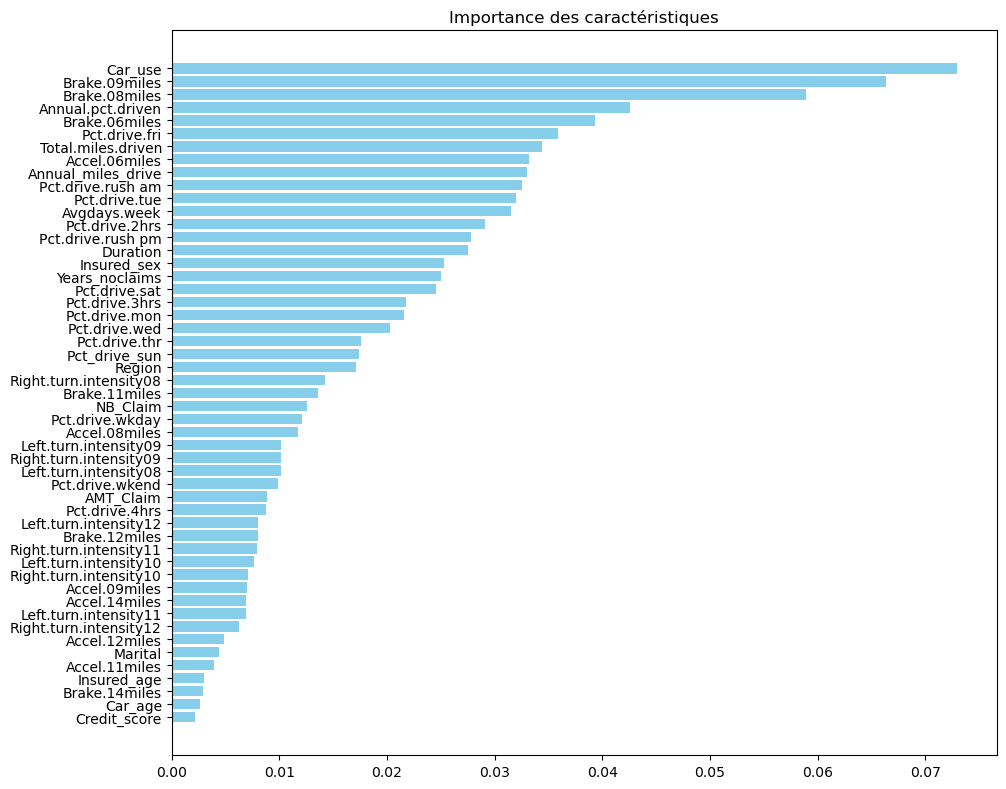

In [16]:
# Importance des caractéristiques
import matplotlib.pyplot as plt
import numpy as np

# Assurez-vous que 'feature_names' contient les noms corrects des caractéristiques.
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [feature_names[i] for i in indices]

plt.figure(figsize=(12, 8))  # Augmentez la taille de la figure pour mieux voir les étiquettes
plt.title("Importance des caractéristiques")
plt.barh(range(len(feature_importances)), feature_importances[indices], color='skyblue')
plt.yticks(range(len(feature_importances)), names)
plt.gca().invert_yaxis()  # Inverse l'axe y pour afficher le plus important en haut
plt.tight_layout()  # Utilisez tight_layout pour ajuster automatiquement les tailles et positions

# Option pour améliorer la lisibilité des étiquettes
plt.subplots_adjust(left=0.3)  # Ajustez ceci pour donner plus de place aux étiquettes

plt.show()

### GBM

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Entraînement d'un modèle GBM
gbm_model = GradientBoostingRegressor( random_state=42)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [18]:
# Prédiction sur les données de test
y_pred = gbm_model.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 14072551.22538975
Mean Absolute Error (MAE): 2399.8237377613627
R-squared (R²): 0.3134390478346344


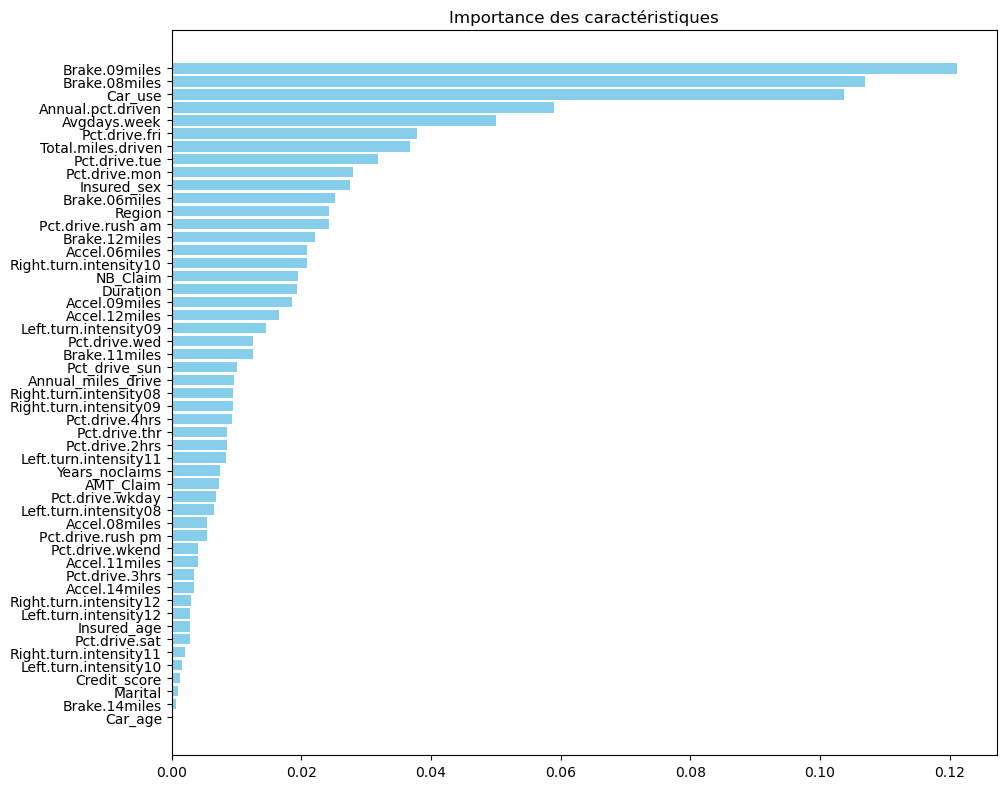

In [19]:
# Assurez-vous que 'feature_names' contient les noms corrects des caractéristiques.
feature_importances = gbm_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [feature_names[i] for i in indices]

plt.figure(figsize=(12, 8))
plt.title("Importance des caractéristiques")
plt.barh(range(len(feature_importances)), feature_importances[indices], color='skyblue')
plt.yticks(range(len(feature_importances)), names)
plt.gca().invert_yaxis()  # Inverse l'axe y pour afficher le plus important en haut
plt.tight_layout()  # Utilisez tight_layout pour ajuster automatiquement les tailles et positions

# Option pour améliorer la lisibilité des étiquettes
plt.subplots_adjust(left=0.3)  # Ajustez ceci pour donner plus de place aux étiquettes

plt.show()

In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Préparation des données
X = data.drop('AMT_Claim', axis=1)  # Assurez-vous que df contient seulement les variables nécessaires
y = data['AMT_Claim']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Création du modèle XGBoost
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                alpha = 10, n_estimators = 100)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

In [23]:
# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)


Mean Squared Error:  9485043.813117895
Mean Absolute Error:  2020.6242378207521
R-squared:  0.5372508788658487


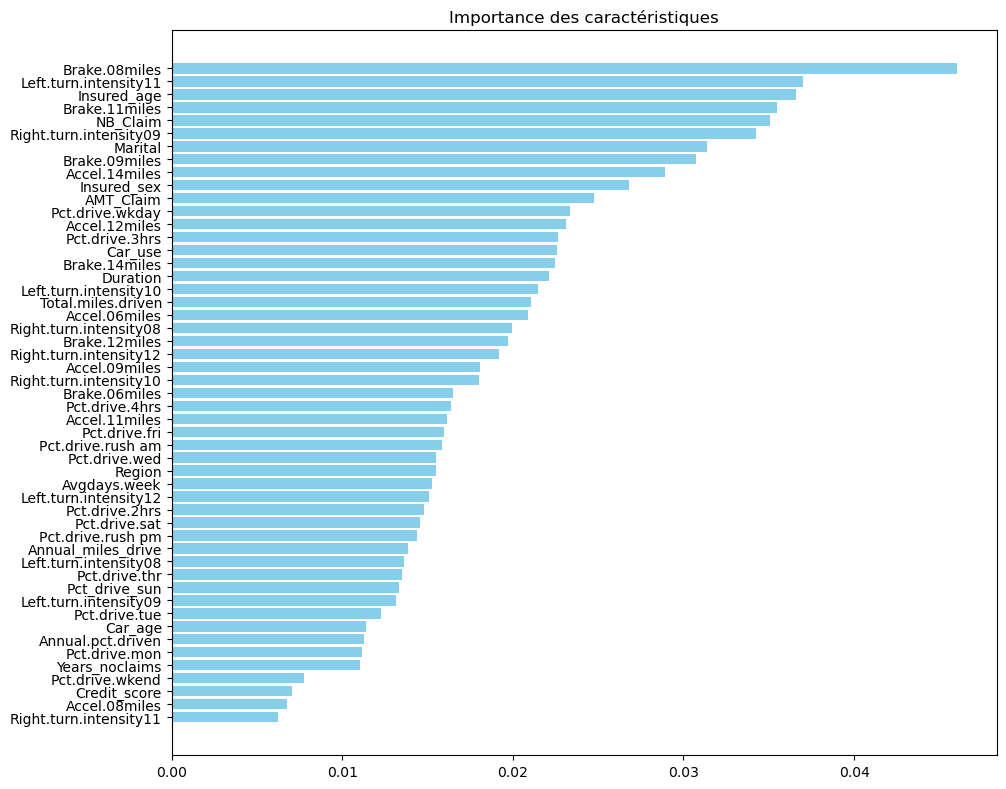

In [24]:
# Assurez-vous que 'feature_names' contient les noms corrects des caractéristiques.
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [feature_names[i] for i in indices]

plt.figure(figsize=(12, 8))  # Augmentez la taille de la figure pour mieux voir les étiquettes
plt.title("Importance des caractéristiques")
plt.barh(range(len(feature_importances)), feature_importances[indices], color='skyblue')
plt.yticks(range(len(feature_importances)), names)
plt.gca().invert_yaxis()  # Inverse l'axe y pour afficher le plus important en haut
plt.tight_layout()  # Utilisez tight_layout pour ajuster automatiquement les tailles et positions

# Option pour améliorer la lisibilité des étiquettes
plt.subplots_adjust(left=0.3)  # Ajustez ceci pour donner plus de place aux étiquettes

plt.show()

- Le modèle XGBoost, tout en ayant un MSE comparable à celui de Random Forest, montre un R²  légèrement inférieur, ce qui pourrait indiquer une moindre efficacité pour certaines distributions de données.